# 4장

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4.1 데이터에서 학습한다!


가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻

### 4.1.1 데이터 주도 학습

기계학습(머신러닝) : 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도\
신경망, 딥러닝 : 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제

### 4.1.2 훈련 데이터와 시험 데이터

훈련 데이터와 시험 데이터를 나누는 이유 -> *범용능력을 평가하기 위해\
*범용능력이란? 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력

오버피팅(과적합)을 피하는 것도 기계학습의 중요한 과제.

## 4.2 손실 함수

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현함.\
그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것.\
-> 신경망 학습에서 사용하는 지표 : 손실함수

### 4.2.1 오차제곱합

보통 회귀에서 많이 씀.

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 소프트맥스 함수의 출력값
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # one-hot encoding

위 배열은 첫 번째 인덱스부터 순서대로 숫자 '0', '1', '2', ...일 때의 값임.\
y는 해당 숫자일 확률, t는 해당 숫자일 때 1을 나타냄.

In [3]:
# 오차제곱합 구현
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2) # ((각 원소의 출력 - 정답 레이블)**2) 총합

0.5를 왜 곱할까?

In [4]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [5]:
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

np.float64(0.09750000000000003)

In [6]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

np.float64(0.5975)

결과
- 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있음.
- 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단할 수 있음.

### 4.2.2 교차 엔트로피 오차

보통 분류에서 많이 씀.

정답일 때의 출력이 전체 값을 정하게 됨.\
정답일 때의 출력이 작아질수록 오차는 커짐.

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta)) # np.log()에 0이 입력되면 -inf가 되어 계산할 수 없기 때문에 delta를 더해준다.

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

np.float64(2.302584092994546)

결과
- 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단.
- 정답일 가능성이 놏아질수록 오차 값이 줄어듦.

### 4.2.3 미니배치 학습

미니배치 학습을 하는 이유!
- 훈련 데이터가 매우 크면 모든 데이터를 대상으로 손실 함수의 하을 구하려면 시간이 오래 걸림.
- 많은 데이터를 대상으로 손실 함수를 계산하는 것은 현실적이지 않음.\
-> 데이터 일부를 추려 전체의 '근사치'로 이용.\
-> 훈련 데이터로부터 일부만 골라 학습 수행

In [10]:
import sys, os
sys.path.append(os.pardir)
from datasets.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [12]:
np.random.choice(60000, 10)

array([36319,  2572, 42345,  3058, 12664,  4456, 52147, 43015, 11554,
       46505], dtype=int32)

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [13]:
# 정답 레이블이 원-핫 인코딩인 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [14]:
# 정답 레이블이 숫자 레이블인 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

'정확도'대신 '손실 함수'를 사용하는 이유는?
- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실함수의 값을 가능한 한 작게 하는 매개변수 값을 찾음.
- 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 갱신하는 과정 반복
- 미분 값이 음수면? -> 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄임.
- 미분 값이 양수면? -> 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄임.
- 미분 값이 0이면? -> 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않음. -> 이 때 갱신을 멈춤.\

정확도를 지표로 삼아서는 안 되는 이유는?
- 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문
- 매개변수의 미소한 변화에는 거의 반응을 보이지 않음.
- 반응이 있더라도 그 값이 불연속적으로 갑자기 변화.

## 4.3 수치 미분

### 4.3.1 미분

In [15]:
# 나쁜 구현
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [16]:
np.float32(1e-50)

np.float32(0.0)

In [17]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예

In [18]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

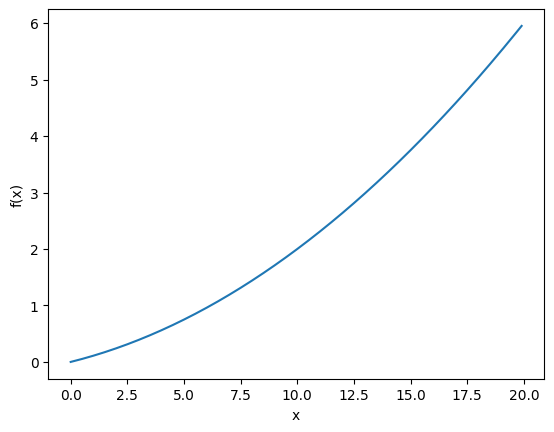

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [20]:
numerical_diff(function_1, 5)

0.1999999999990898

In [21]:
numerical_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분

In [22]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

문제1

In [23]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [24]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제 2

In [25]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [26]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

In [27]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

In [28]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [29]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [30]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [31]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [33]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [34]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [35]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [36]:
import sys, os
import numpy as np
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [37]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 0.83734509 -0.76661018  0.13439913]
 [ 0.0127889  -0.22697866  1.20174519]]


In [38]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.51391707 -0.6642469   1.16221014]


In [39]:
np.argmax(p) # 최댓값의 인덱스

np.int64(2)

In [40]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

np.float64(0.5211245632248231)

In [41]:
def f(W):
    return net.loss(x, t)

In [42]:
dW = numerical_gradient(f, net.W) # (손실함수, 가중치 매개변수)
print(dW) # 기울기

[[ 0.18632858  0.05736003 -0.24368861]
 [ 0.27949287  0.08604004 -0.36553292]]


In [43]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기기

**전제**

- 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 조정하는 과정을 학습이라고 한다.

**1단계: 미니배치**

- **훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라고 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표**이다.

**2단계: 기울기 산출**

- 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 

- 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

**3단계: 매개변수 갱신**

- 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다

**4단계: 반복**

- 1~3단계를 반복한다

### 4.5.1 2층 신경망 클래스 구현하기

In [44]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [45]:
net = TwoLayerNet(input_size=784, hidden_size = 100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [46]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [47]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 데이터(100장 분량)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [52]:
import numpy as np
def download_mnist():
    for v in key_file.values():
       _download(v)
       
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

NameError: name 'key_file' is not defined